In [1]:
from __future__ import print_function, division
# import torch
# import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
# import torchvision
from torchvision import datasets, models, transforms, utils
import matplotlib.pyplot as plt
# import time
# import os
# import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

from PIL import Image #Pillow -- default image backend supported by TorchVision

import cv2

In [2]:
model = models.detection.fasterrcnn_resnet50_fpn(weights='FasterRCNN_ResNet50_FPN_Weights.COCO_V1')
#(pretrained=True) 
model.eval()


#Define class names - re: PyTorch docs
COCO_INSTANCE_CATEGORY_NAMES = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [3]:
img_path = 'girl_cars.jpg'
threshold=0.25

img = Image.open(img_path)
transform = transforms.Compose([transforms.ToTensor()])
img = transform(img)
pred = model([img])
pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
pred_score = list(pred[0]['scores'].detach().numpy())
pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
pred_boxes = pred_boxes[:pred_t+1]
pred_class = pred_class[:pred_t+1]



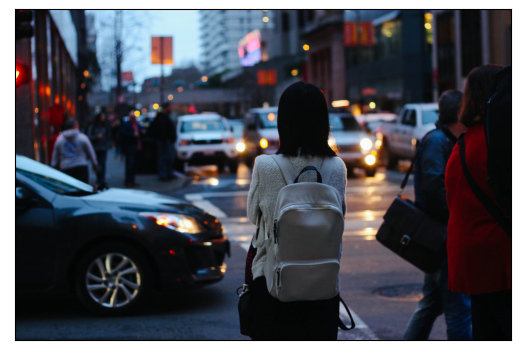

In [4]:
# Read image with cv2 
img = cv2.imread(img_path) 

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

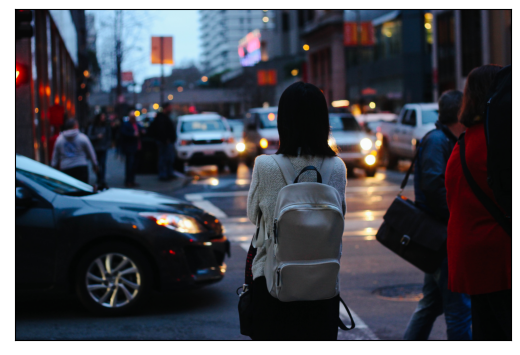

In [6]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path

dog1_int = read_image(str('girl_cars.jpg'))
dog_list = [dog1_int]

grid = make_grid(dog_list)
show(grid)

In [7]:
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights

weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

images = [transforms(d) for d in dog_list]

model = maskrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

output = model(images)
print(output)

[{'boxes': tensor([[3.6327e+02, 1.1027e+03, 9.3633e+02, 1.8900e+03],
        [4.4507e+03, 6.1756e+02, 5.1794e+03, 3.3112e+03],
        [0.0000e+00, 1.4582e+03, 2.2680e+03, 3.2072e+03],
        [1.3990e+03, 1.0218e+03, 1.6927e+03, 1.7789e+03],
        [4.0940e+03, 9.1092e+02, 4.7655e+03, 3.3651e+03],
        [1.0766e+03, 1.1080e+03, 1.3307e+03, 1.8781e+03],
        [3.2387e+03, 1.0569e+03, 3.8209e+03, 1.7690e+03],
        [2.3822e+03, 7.8598e+02, 3.5087e+03, 3.4221e+03],
        [7.5072e+02, 1.0687e+03, 1.0149e+03, 1.8323e+03],
        [1.6476e+03, 1.0875e+03, 2.3447e+03, 1.6534e+03],
        [3.7305e+03, 9.5498e+02, 4.4908e+03, 1.6509e+03],
        [3.7451e+03, 1.4369e+03, 4.5387e+03, 2.7253e+03],
        [2.5091e+03, 1.5597e+03, 3.4790e+03, 3.0739e+03],
        [3.5896e+03, 1.0718e+03, 3.9944e+03, 1.3306e+03],
        [4.0434e+03, 8.9455e+02, 4.6998e+03, 2.2704e+03],
        [2.2799e+03, 1.0492e+03, 2.7679e+03, 1.6569e+03],
        [2.4934e+03, 9.9299e+02, 3.8074e+03, 1.7426e+03],
   

In [8]:
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights

weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

images = [transforms(d) for d in dog_list]

model = maskrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()


batch = torch.stack([transforms(d) for d in dog_list])


In [9]:
#output = model(batch)
#output
#print(output.shape, output.min().item(), output.max().item())

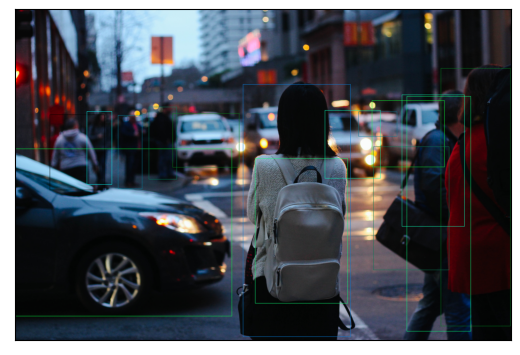

In [10]:
score_threshold = .8
dogs_with_boxes = [
    utils.draw_bounding_boxes(dog_int, boxes=output['boxes'][output['scores'] > score_threshold], width=4)
    for dog_int, output in zip(dog_list, output)
]
show(dogs_with_boxes)

In [11]:
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights

weights = FCN_ResNet50_Weights.DEFAULT
transforms = weights.transforms(resize_size=None)

model = fcn_resnet50(weights=weights, progress=False)
model = model.eval()

batch = torch.stack([transforms(d) for d in dog_list])
output = model(batch)['out']
print(output.shape, output.min().item(), output.max().item())

torch.Size([1, 21, 3456, 5184]) -5.701213836669922 12.282217025756836


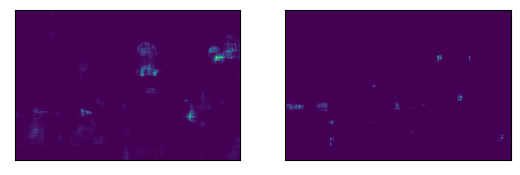

In [12]:
sem_class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}

normalized_masks = torch.nn.functional.softmax(output, dim=1)

dog_and_boat_masks = [
    normalized_masks[img_idx, sem_class_to_idx[cls]]
    for img_idx in range(len(dog_list))
    for cls in ('dog', 'boat')
]

show(dog_and_boat_masks)

shape = torch.Size([1, 3456, 5184]), dtype = torch.bool


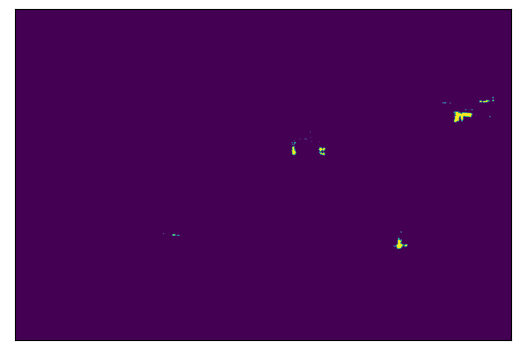

In [13]:
class_dim = 1
boolean_dog_masks = (normalized_masks.argmax(class_dim) == sem_class_to_idx['dog'])
print(f"shape = {boolean_dog_masks.shape}, dtype = {boolean_dog_masks.dtype}")
show([m.float() for m in boolean_dog_masks])